# Notebook Setup

In [1]:
!hostname

hgn14.wexac.weizmann.ac.il


In [2]:
%load_ext autoreload
%autoreload 2

# Imports

In [3]:
import sys
import os
NOVA_HOME = "/home/projects/hornsteinlab/giliwo/NOVA"
os.environ["NOVE_HOME"] = NOVA_HOME
sys.path.insert(1, NOVA_HOME)
print(os.getenv("NOVE_HOME"))


/home/projects/hornsteinlab/giliwo/NOVA


In [4]:
from tools.attn_maps_plotting.get_attn_from_paths import generate_attn_maps_with_model
from src.common.utils import load_config_file
from src.datasets.dataset_config import DatasetConfig
from src.figures.plot_config import PlotConfig
from src.attention_maps.attention_config import AttnConfig

NOVA_HOME: /home/projects/hornsteinlab/giliwo/NOVA
NOVA_HOME: /home/projects/hornsteinlab/giliwo/NOVA
NOVA_HOME: /home/projects/hornsteinlab/giliwo/NOVA


# Parmas Setup

Define here the paramaters controlling which data and how it will be displayed.

In [5]:

MODEL_NAMES = ["finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen"]

DATASET_CONFIG_NAME = 'EmbeddingsAlyssaCoyneDatasetConfig'

BATCH_SIZE = 50

SAVE_PLOT:bool = True # save attn figures in the target directory

SHOW_PLOT:bool = True # display attn figures in notebook

DISPLAY_ATTN_SCORE:bool = False # display attn scores on top of the image

NUM_WORKERS:int = 1 # multiprocessing number of workers 


"""
dictonary consists of -
      keys:     description (str, the subdir name the figures will be saved in)
      values:   list of paths (each path is a str of the format - [path/to/<file_name>.npy/<tile_number>])
"""
PATH_DICT = {
        "Test_Run":
        [
            "/home/projects/hornsteinlab/Collaboration/NOVA/input/images/processed/ManuscriptFinalData_80pct/AlyssaCoyne/batch1/Controls/Untreated/DCP1A/rep6_R11_w2confCy5_s57_panelA_Controls_processed.npy/4",
            "/home/projects/hornsteinlab/Collaboration/NOVA/input/images/processed/ManuscriptFinalData_80pct/AlyssaCoyne/batch1/Controls/Untreated/DCP1A/rep6_R11_w2confCy5_s57_panelA_Controls_processed.npy/5",
            "/home/projects/hornsteinlab/Collaboration/NOVA/input/images/processed/ManuscriptFinalData_80pct/AlyssaCoyne/batch1/Controls/Untreated/DCP1A/rep6_R11_w2confCy5_s57_panelA_Controls_processed.npy/6"

        ]

    }

# Paths and Configs

In [6]:

# DEFINE PATHS
MODEL_DIR = os.path.join(os.getenv("NOVE_HOME"), "outputs", "vit_models")
CONFIG_PATH_DATA = os.path.join('manuscript','embeddings_config',DATASET_CONFIG_NAME)
CONFIG_PATH_ATTN = os.path.join('manuscript','manuscript_attention_config', 'BaseAttnConfig')
CONFIG_PATH_PLOT = os.path.join('tools','attn_maps_plotting','manuscript_plot_attention_map_config','BaseAttnMapPlotConfig'
)
CONFIG_PATH_CORR = os.path.join('manuscript','manuscript_attn_corr_scores_config', 'AttnScoresConfig') 


In [7]:
# load configs
config_data:DatasetConfig = load_config_file(CONFIG_PATH_DATA, "data")
config_attn:AttnConfig = load_config_file(CONFIG_PATH_ATTN, "data")
config_plot:PlotConfig = load_config_file(CONFIG_PATH_PLOT, "plot")

if DISPLAY_ATTN_SCORE:
    config_corr = load_config_file(CONFIG_PATH_CORR, "data") 
else:
    config_corr = None

# update arguments
config_plot.SAVE_PLOT = SAVE_PLOT
config_plot.SHOW_PLOT = SHOW_PLOT
config_plot.PLOT_ATTN_NUM_WORKERS = NUM_WORKERS

# Main

2025-09-15 17:58:32 INFO: [EmbeddingsAlyssaCoyneDatasetConfig] Init (log path: /home/projects/hornsteinlab/giliwo/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/logs/150925_175832_682698_977923_giliwo_binbash.log; JOBID: 977923 Username: giliwo) JOBNAME: binbash
2025-09-15 17:58:32 INFO: [EmbeddingsAlyssaCoyneDatasetConfig] NOVA_HOME=/home/projects/hornsteinlab/giliwo/NOVA, NOVA_DATA_HOME=/home/projects/hornsteinlab/Collaboration/NOVA/input


Starting generate attention maps for finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen...


2025-09-15 17:58:33 INFO: Creating Vision Transformer with version: tiny, MLP head: True
2025-09-15 17:58:34 INFO: is_MLP_head: True
2025-09-15 17:58:34 INFO: Using MLP head with hidden dim 768 and num_classes 128
2025-09-15 17:58:34 INFO: 1 files processed from explicit list, 1 labels generated
2025-09-15 17:58:34 INFO: [generate_attn_maps_with_dataloader] Data loaded: there are 1 images.


is_MLP_head: True
Using MLP head with hidden dim 768 and num_classes 128 


2025-09-15 17:58:34 INFO: Resources (Free, Used, Total): [('48218 MiB', '355 MiB', '49140 MiB')]
2025-09-15 17:58:34 INFO: X shape: torch.Size([10, 2, 100, 100]), y shape: torch.Size([10]), paths shape: (10,)
2025-09-15 17:58:34 INFO: [Inference] Batch number: 0/1
/home/projects/hornsteinlab/giliwo/.conda/envs/nova/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1711403392949/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,
2025-09-15 17:58:34 INFO: [generate_attn_maps_with_dataloader] total attn_maps: (10, 12, 3, 50, 50)
2025-09-15 17:58:34 INFO: [process_attn_maps] unique_batches: ['batch1']
2025-09-15 17:58:34 INFO: [process_attn_maps]: for set testset, starting proceesing 3 samples.


paths (3,)
attn_maps (3, 12, 3, 50, 50)
labels (3,)


2025-09-15 17:58:34 INFO: [plot_attn_maps]: for set testset, starting plotting 3 samples.
2025-09-15 17:58:34 INFO: [plot_attn_maps] Sample Path: /home/projects/hornsteinlab/Collaboration/NOVA/input/images/processed/ManuscriptFinalData_80pct/AlyssaCoyne/batch1/Controls/Untreated/DCP1A/rep6_R11_w2confCy5_s57_panelA_Controls_processed.npy
2025-09-15 17:58:34 INFO: [plot_attn_maps] Sample Info: site:57, tile:4, label:DCP1A_Controls_Untreated_batch1_rep6
2025-09-15 17:58:35 INFO: [plot_attn_maps] Attention overlay threshold: 0.3
2025-09-15 17:58:35 INFO: [plot_attn_maps] attn maps saved: /home/projects/hornsteinlab/giliwo/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/attention_maps/Test_Run/rep6_R11_w2confCy5_s57_panelA_Controls_processed/DCP1A_Controls_Untreated_batch1_rep6_Tile4.png


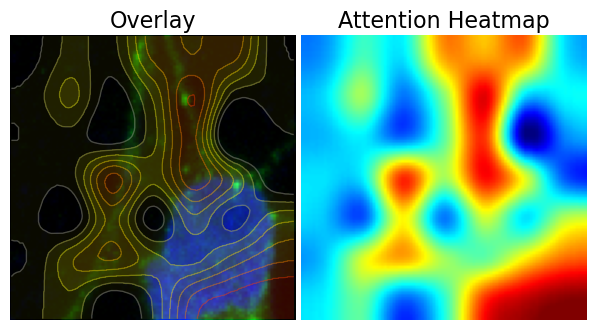

2025-09-15 17:58:35 INFO: [plot_attn_maps] Sample Path: /home/projects/hornsteinlab/Collaboration/NOVA/input/images/processed/ManuscriptFinalData_80pct/AlyssaCoyne/batch1/Controls/Untreated/DCP1A/rep6_R11_w2confCy5_s57_panelA_Controls_processed.npy
2025-09-15 17:58:35 INFO: [plot_attn_maps] Sample Info: site:57, tile:5, label:DCP1A_Controls_Untreated_batch1_rep6
2025-09-15 17:58:35 INFO: [plot_attn_maps] Attention overlay threshold: 0.3
2025-09-15 17:58:35 INFO: [plot_attn_maps] attn maps saved: /home/projects/hornsteinlab/giliwo/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/attention_maps/Test_Run/rep6_R11_w2confCy5_s57_panelA_Controls_processed/DCP1A_Controls_Untreated_batch1_rep6_Tile5.png


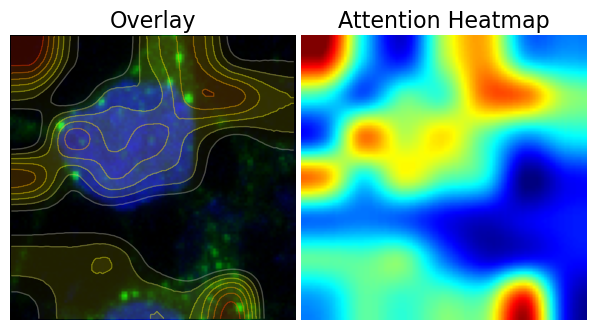

2025-09-15 17:58:36 INFO: [plot_attn_maps] Sample Path: /home/projects/hornsteinlab/Collaboration/NOVA/input/images/processed/ManuscriptFinalData_80pct/AlyssaCoyne/batch1/Controls/Untreated/DCP1A/rep6_R11_w2confCy5_s57_panelA_Controls_processed.npy
2025-09-15 17:58:36 INFO: [plot_attn_maps] Sample Info: site:57, tile:6, label:DCP1A_Controls_Untreated_batch1_rep6
2025-09-15 17:58:36 INFO: [plot_attn_maps] Attention overlay threshold: 0.3
2025-09-15 17:58:36 INFO: [plot_attn_maps] attn maps saved: /home/projects/hornsteinlab/giliwo/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/AlyssaCoyne/attention_maps/Test_Run/rep6_R11_w2confCy5_s57_panelA_Controls_processed/DCP1A_Controls_Untreated_batch1_rep6_Tile6.png


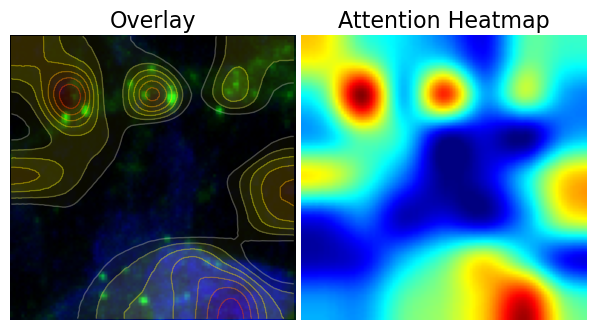

Done


In [8]:


for model_name in MODEL_NAMES:
    outputs_folder_path = os.path.join(MODEL_DIR, model_name)
    config_data.OUTPUTS_FOLDER = outputs_folder_path

    try:
            print(f"Starting generate attention maps for {model_name}...")
            generate_attn_maps_with_model(PATH_DICT, outputs_folder_path, config_data, 
                                        config_attn, config_plot,
                                        config_corr, BATCH_SIZE)
            
    except Exception as e:
            print(e)
            raise e

print("Done")
